# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
Train = pd.read_csv(r"D:\Anime\ML Project\train.csv")
Test  = pd.read_csv(r"D:\Anime\ML Project\test.csv")

In [3]:
Data = pd.concat([Train, Test])
Data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Cleaning

## Drop unneeded row

In [4]:
Data = Data.drop('Unnamed: 0', axis=1)
Data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
Data.shape

(129880, 24)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

## Drop Nan value 

In [7]:
Data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [8]:
Data =Data.dropna().copy()

In [9]:
Data.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## check if there is any duplicated value

In [10]:
Data.duplicated().any() 

False

## see count , mean , std .. etc

In [11]:
Data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## see if there is any outliers ..

<Axes: xlabel='Departure Delay in Minutes'>

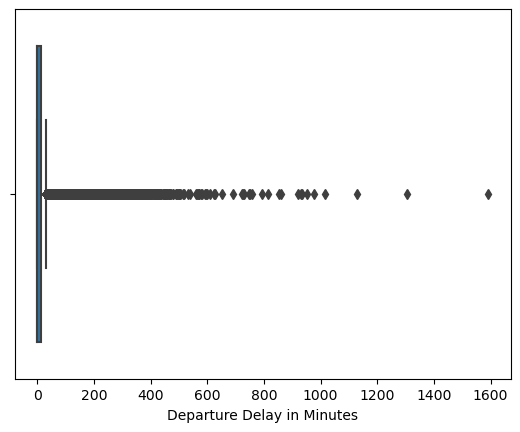

In [12]:
sns.boxplot(x=Data['Departure Delay in Minutes'])

<Axes: xlabel='Arrival Delay in Minutes'>

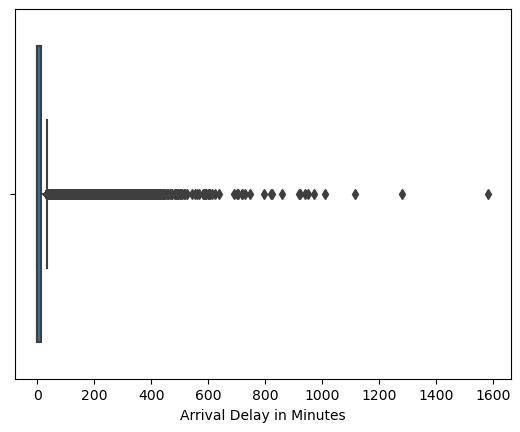

In [13]:
sns.boxplot(x=Data['Arrival Delay in Minutes'])

In [14]:
Data.loc[Data['Departure Delay in Minutes'] > 1100]

Data.loc[Data['Arrival Delay in Minutes'] > 1100]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied
17429,73482,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,2,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied


In [15]:
Data.shape

(129487, 24)

In [16]:
Outliers = Data[Data['Arrival Delay in Minutes'] > 1100].index
Data.drop(Outliers, inplace=True)
Data.shape

(129482, 24)

# Data Visualization

 ## linear relationship between Departure Delay in Minutes and Arrival

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

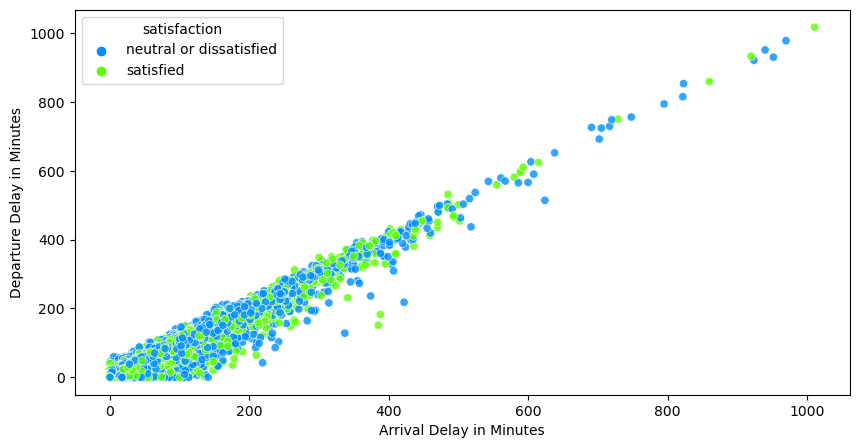

In [17]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=Data,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

## Feature Counts

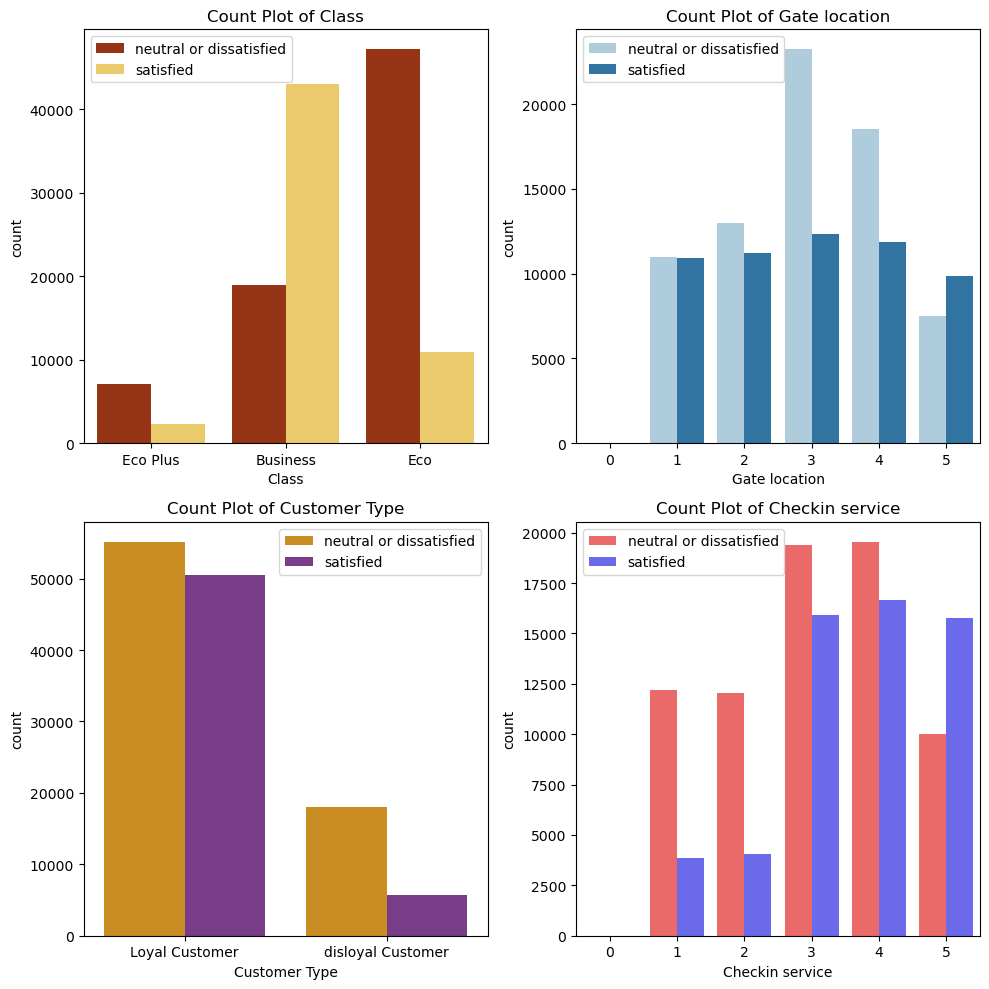

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=Data, x="Class" , hue="satisfaction", palette="afmhot")
plt.title("Count Plot of Class")
plt.legend()

plt.subplot(2,2,2)
sns.countplot(data=Data, x="Gate location" , hue="satisfaction", palette="Paired")
plt.title("Count Plot of Gate location")
plt.legend()

plt.subplot(2,2,3)
sns.countplot(data=Data, x="Customer Type" , hue="satisfaction", palette="CMRmap_r")
plt.title("Count Plot of Customer Type")
plt.legend()

plt.subplot(2,2,4)
sns.countplot(data=Data, x="Checkin service" , hue="satisfaction", palette="seismic_r")
plt.title("Count Plot of Checkin service")
plt.legend()
plt.tight_layout()
plt.show()

# Encoding

## Target Encoding

In [19]:
Data['satisfaction'].value_counts()

neutral or dissatisfied    73223
satisfied                  56259
Name: satisfaction, dtype: int64

In [20]:
Data['satisfaction']

0        neutral or dissatisfied
1        neutral or dissatisfied
2                      satisfied
3        neutral or dissatisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 129482, dtype: object

In [21]:
Satisfaction= {'neutral or dissatisfied':0,'satisfied':1}
Data['satisfaction'] = Data['satisfaction'].map(Satisfaction)
Data['satisfaction']

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129482, dtype: int64

## Features Encoding

### Label Encoding

In [22]:
Data['Gender']

0          Male
1          Male
2        Female
3        Female
4          Male
          ...  
25971      Male
25972      Male
25973    Female
25974      Male
25975    Female
Name: Gender, Length: 129482, dtype: object

In [23]:
Gender= {'Male':0,'Female':1}
Data['Gender'] = Data['Gender'].map(Gender)
Data['Gender']

0        0
1        0
2        1
3        1
4        0
        ..
25971    0
25972    0
25973    1
25974    0
25975    1
Name: Gender, Length: 129482, dtype: int64

In [24]:
Data['Customer Type']

0           Loyal Customer
1        disloyal Customer
2           Loyal Customer
3           Loyal Customer
4           Loyal Customer
               ...        
25971    disloyal Customer
25972       Loyal Customer
25973       Loyal Customer
25974       Loyal Customer
25975       Loyal Customer
Name: Customer Type, Length: 129482, dtype: object

In [25]:
Customer= {'Loyal Customer':0,'disloyal Customer':1}
Data['Customer Type'] = Data['Customer Type'].map(Customer)
Data['Customer Type']

0        0
1        1
2        0
3        0
4        0
        ..
25971    1
25972    0
25973    0
25974    0
25975    0
Name: Customer Type, Length: 129482, dtype: int64

In [26]:
Data['Type of Travel']

0        Personal Travel
1        Business travel
2        Business travel
3        Business travel
4        Business travel
              ...       
25971    Business travel
25972    Business travel
25973    Personal Travel
25974    Business travel
25975    Personal Travel
Name: Type of Travel, Length: 129482, dtype: object

In [27]:
Taverl_type = {'Personal Travel':0,'Business travel':1}
Data['Type of Travel'] = Data['Type of Travel'].map(Taverl_type)
Data['Type of Travel']

0        0
1        1
2        1
3        1
4        1
        ..
25971    1
25972    1
25973    0
25974    1
25975    0
Name: Type of Travel, Length: 129482, dtype: int64

### One Hot Encoding

In [28]:
Data['Class']

0        Eco Plus
1        Business
2        Business
3        Business
4        Business
           ...   
25971    Business
25972    Business
25973         Eco
25974    Business
25975         Eco
Name: Class, Length: 129482, dtype: object

In [29]:
Dummies = pd.get_dummies(Data['Class'])
Data = pd.concat([Data, Dummies], axis=1)
Data = Data.drop('Class', axis=1)
Data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,70172,0,0,13,0,460,3,4,3,1,...,4,4,5,5,25,18.0,0,0,0,1
1,5047,0,1,25,1,235,3,2,3,3,...,3,1,4,1,1,6.0,0,1,0,0
2,110028,1,0,26,1,1142,2,2,2,2,...,4,4,4,5,0,0.0,1,1,0,0
3,24026,1,0,25,1,562,2,5,5,5,...,3,1,4,2,11,9.0,0,1,0,0
4,119299,0,0,61,1,214,3,3,3,3,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,1,34,1,526,3,3,3,1,...,4,4,5,4,0,0.0,0,1,0,0
25972,71167,0,0,23,1,646,4,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
25973,37675,1,0,17,0,828,2,5,1,5,...,4,5,4,2,0,0.0,0,0,1,0
25974,90086,0,0,14,1,1127,3,3,3,3,...,5,4,5,4,0,0.0,1,1,0,0


# Scale the numeric features

In [30]:
num_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
scaler = StandardScaler()
Data[num_cols] = scaler.fit_transform(Data[num_cols])

In [31]:
Data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,70172,0,0,13,0,-0.731995,3,4,3,1,...,4,4,5,5,0.277877,0.077481,0,0,0,1
1,5047,0,1,25,1,-0.957545,3,2,3,3,...,3,1,4,1,-0.364171,-0.238863,0,1,0,0
2,110028,1,0,26,1,-0.048327,2,2,2,2,...,4,4,4,5,-0.390923,-0.397035,1,1,0,0
3,24026,1,0,25,1,-0.629746,2,5,5,5,...,3,1,4,2,-0.096651,-0.159777,0,1,0,0
4,119299,0,0,61,1,-0.978597,3,3,3,3,...,4,3,3,3,-0.390923,-0.397035,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,1,34,1,-0.665834,3,3,3,1,...,4,4,5,4,-0.390923,-0.397035,0,1,0,0
25972,71167,0,0,23,1,-0.545540,4,4,4,4,...,5,5,5,4,-0.390923,-0.397035,1,1,0,0
25973,37675,1,0,17,0,-0.363095,2,5,1,5,...,4,5,4,2,-0.390923,-0.397035,0,0,1,0
25974,90086,0,0,14,1,-0.063364,3,3,3,3,...,5,4,5,4,-0.390923,-0.397035,1,1,0,0


# Data Correlations

## Correlation with BALANCE variable

In [32]:
cor_target = abs(Data.corr()['satisfaction'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features.sort_values(ascending=False)

satisfaction                         1.000000
Business                             0.502602
Online boarding                      0.501645
Type of Travel                       0.449776
Eco                                  0.449493
Inflight entertainment               0.398326
Seat comfort                         0.348544
On-board service                     0.322341
Leg room service                     0.312550
Cleanliness                          0.306866
Flight Distance                      0.298213
Inflight wifi service                0.283316
Baggage handling                     0.248654
Inflight service                     0.245019
Checkin service                      0.237117
Food and drink                       0.211145
Customer Type                        0.185924
Ease of Online booking               0.168724
Age                                  0.134004
Eco Plus                             0.106119
Arrival Delay in Minutes             0.058909
Departure/Arrival time convenient 

## people, even though they had a good online boarding experience, they weren't satisified


<Axes: xlabel='satisfaction', ylabel='Online boarding'>

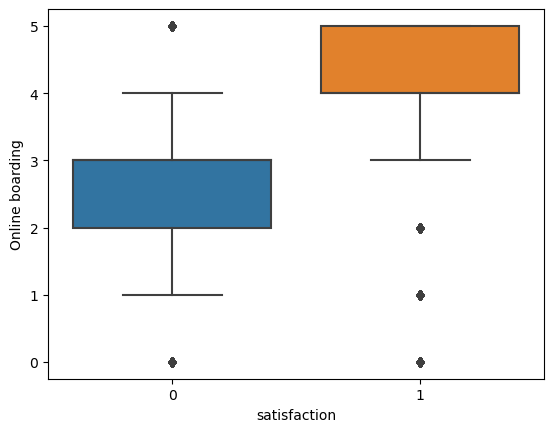

In [33]:
sns.boxplot(x='satisfaction', y='Online boarding', data=Data)

## Correlation matrix

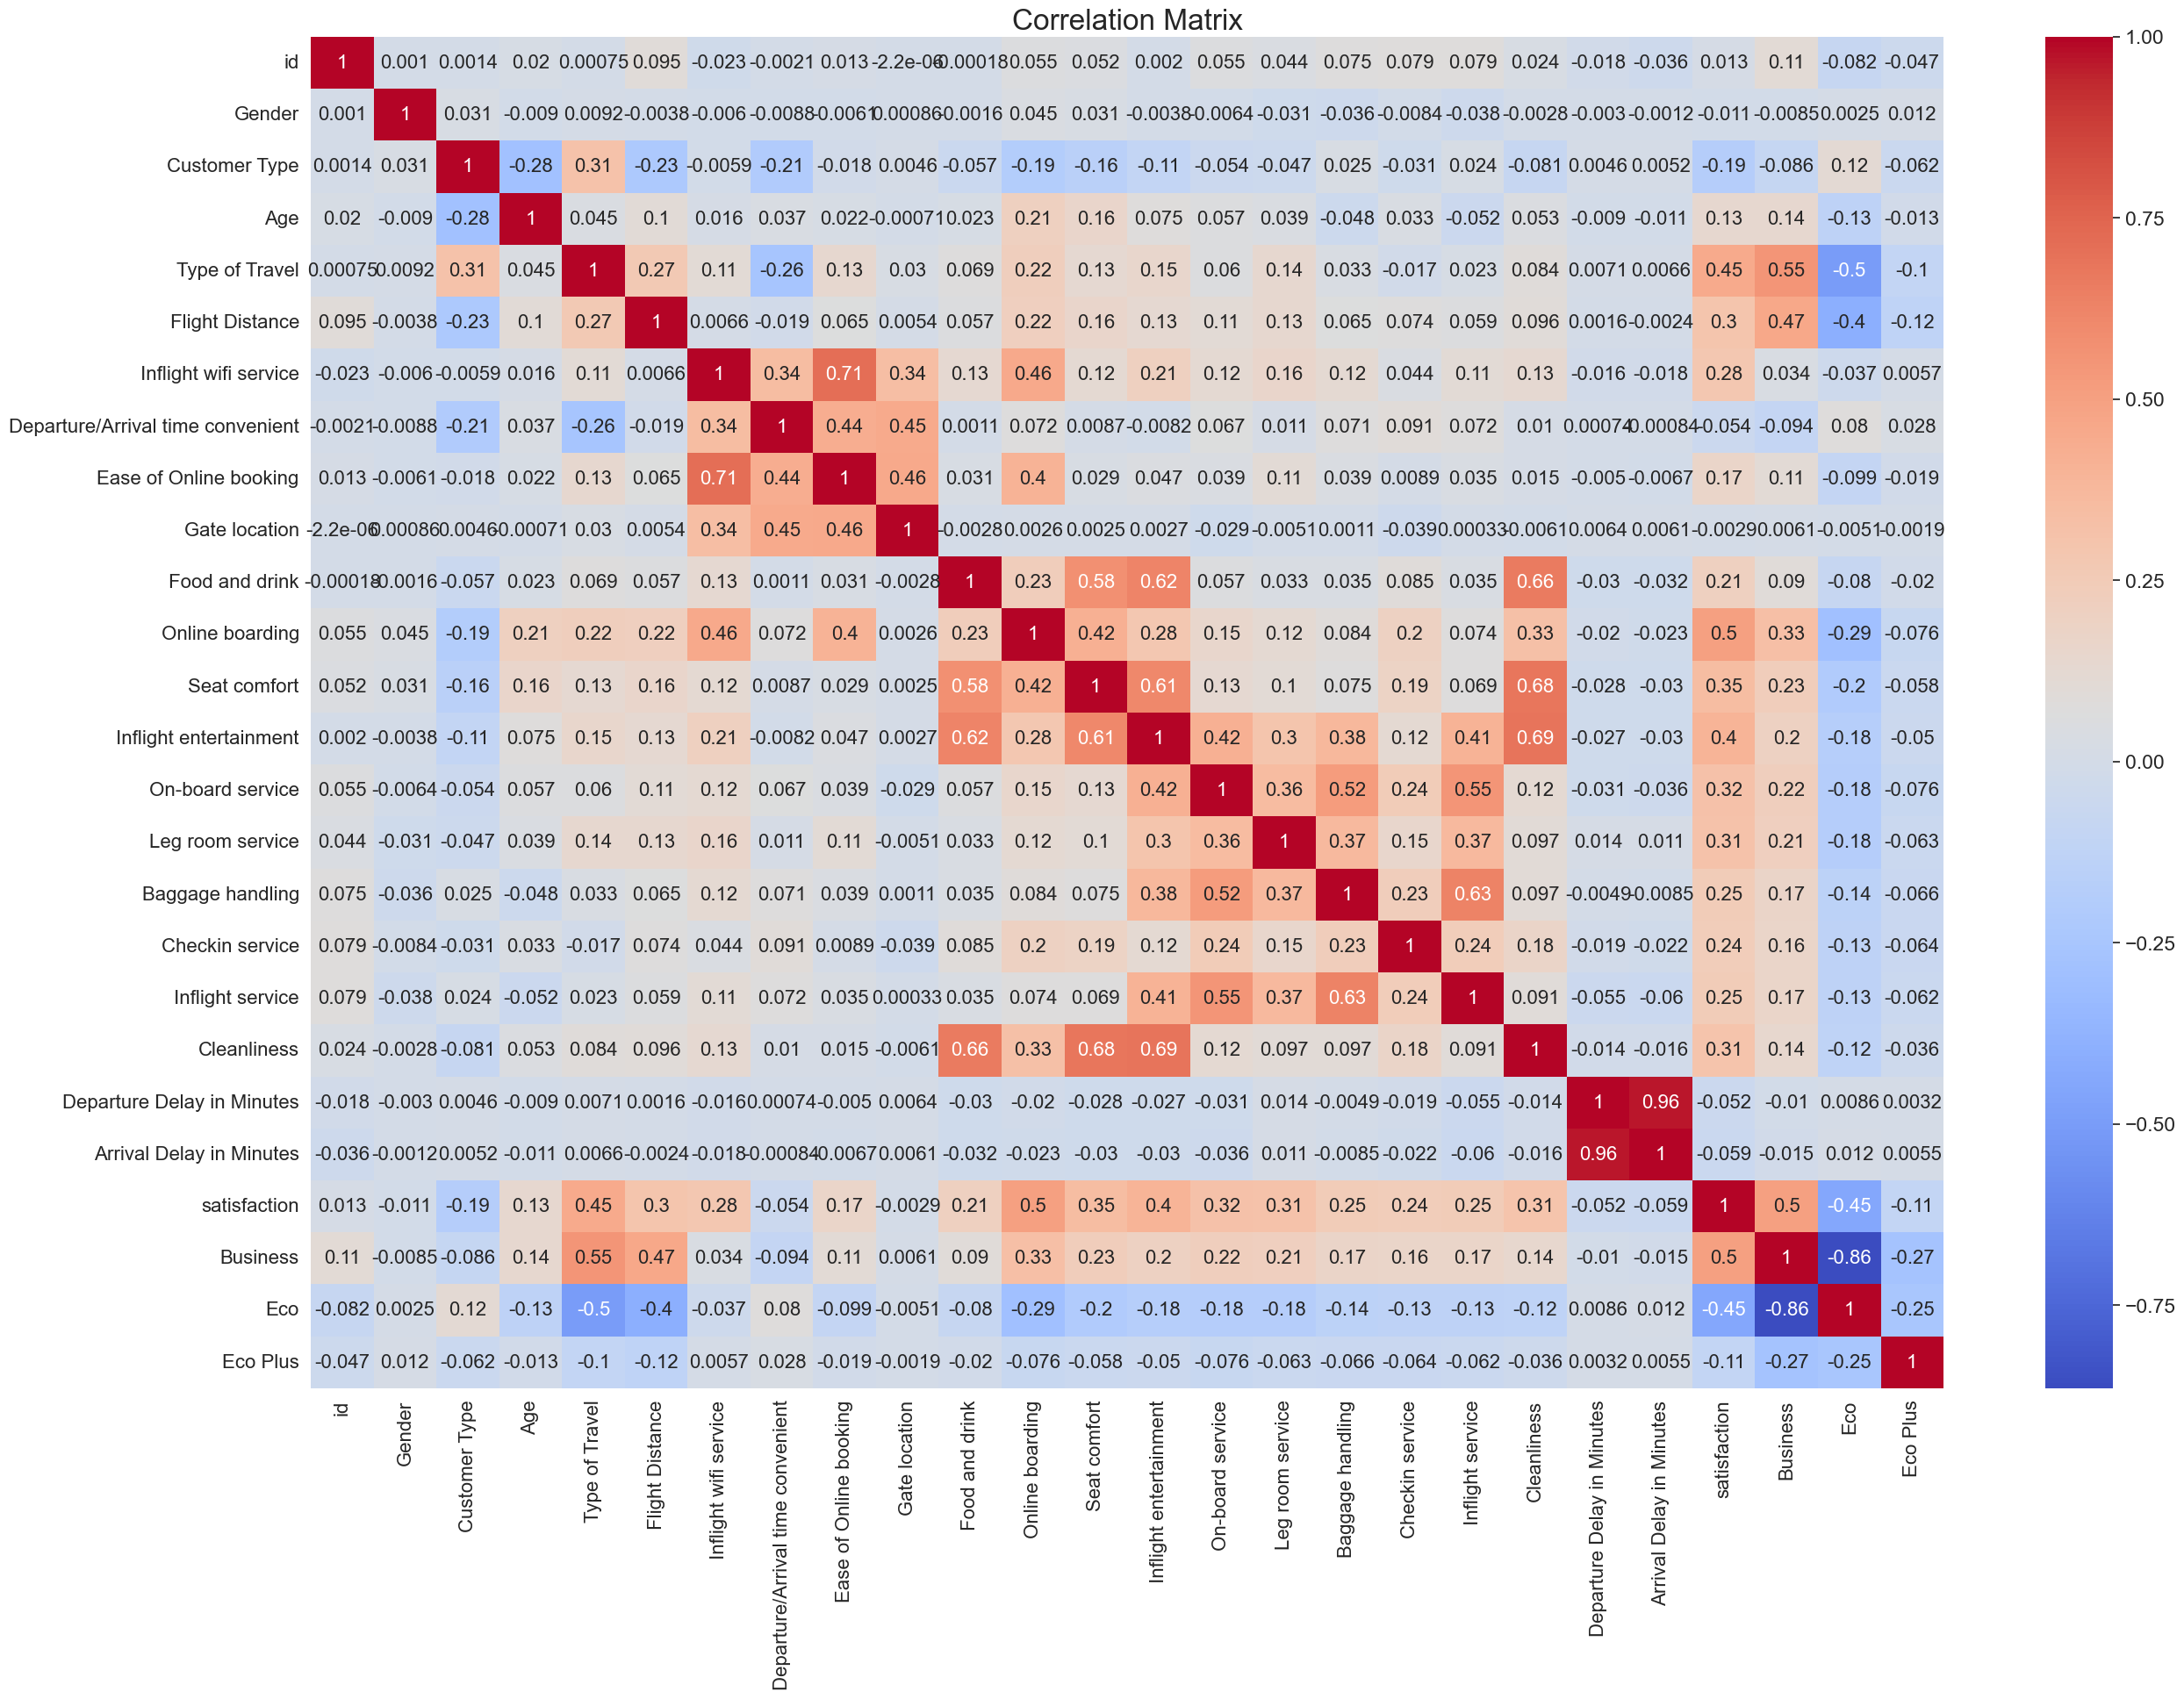

In [34]:
correlation_matrix = Data.corr()
plt.figure(figsize=(30, 20))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 16})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)
plt.title('Correlation Matrix', fontsize=24)
plt.show()

# Determine Features and Target

In [35]:
Data.shape

(129482, 26)

In [36]:
Features = Data.drop(['id','satisfaction'], axis=1)
Target = Data['satisfaction']

In [37]:
Features

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus
0,0,0,13,0,-0.731995,3,4,3,1,5,...,3,4,4,5,5,0.277877,0.077481,0,0,1
1,0,1,25,1,-0.957545,3,2,3,3,1,...,5,3,1,4,1,-0.364171,-0.238863,1,0,0
2,1,0,26,1,-0.048327,2,2,2,2,5,...,3,4,4,4,5,-0.390923,-0.397035,1,0,0
3,1,0,25,1,-0.629746,2,5,5,5,2,...,5,3,1,4,2,-0.096651,-0.159777,1,0,0
4,0,0,61,1,-0.978597,3,3,3,3,4,...,4,4,3,3,3,-0.390923,-0.397035,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,-0.665834,3,3,3,1,4,...,2,4,4,5,4,-0.390923,-0.397035,1,0,0
25972,0,0,23,1,-0.545540,4,4,4,4,4,...,5,5,5,5,4,-0.390923,-0.397035,1,0,0
25973,1,0,17,0,-0.363095,2,5,1,5,2,...,3,4,5,4,2,-0.390923,-0.397035,0,1,0
25974,0,0,14,1,-0.063364,3,3,3,3,4,...,2,5,4,5,4,-0.390923,-0.397035,1,0,0


In [38]:
Target

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129482, dtype: int64

# Splitting dataset to tree parts Training, Validation and Testing.

In [39]:
X, X_test, y, y_test = train_test_split(Features, Target,
                                        test_size = 0.20, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                        test_size = 0.20, random_state = 2)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82868, 24)
(82868,)
(25897, 24)
(25897,)


In [41]:
train_acc=[]
val_acc=[]
test_acc=[]

# **Model**

## KNN Model

### The best values for HyperParameters using GridSearchCV 

**n_neighbors**: This hyperparameter determines the number of nearest neighbors to consider when making a prediction. ***The default value is 5***.

**p**: This hyperparameter determines the distance metric used to calculate the distances between the nearest neighbors. When p=1, the distance metric is Manhattan distance, and when p=2, the distance metric is Euclidean distance. ***The default value is p=2 (Euclidean distance)***.

In [42]:
# # define the parameter grid to search over
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'p': [1, 2]
# }

# # create a KNN model instance
# knn = KNeighborsClassifier()

# # create a GridSearchCV instance with the parameter grid and the KNN model
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# # fit the GridSearchCV instance on the training data
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)
# y_pred_grid_search = grid_search.predict(X_test)
# # print the best hyperparameters and corresponding score
# print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
# print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
# print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

**best values** :
               n_neighbors=5 ***(Default)***, 
               p=1

### Train the KNN model on the training data

In [43]:
KNN = KNeighborsClassifier(p=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(p=1)

### Make predictions on the test data

In [44]:
y_pred_KNN = KNN.predict(X_test)

### Evaluate the performance of the model

In [45]:
train_acc.append(KNN.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, KNN.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_KNN))
print("Train Accuracy:", KNN.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, KNN.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("Recall:", recall_score(y_test, y_pred_KNN))
print("Precision:", precision_score(y_test, y_pred_KNN))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_KNN))
print("Classification report:\n", classification_report(y_test, y_pred_KNN))

Train Accuracy: 0.9482309214654632
Validation Accuracy: 0.9265820340782932
Test Accuracy: 0.9262076688419508
Recall: 0.8970286428125279
Precision: 0.9299722479185939
Confusion matrix:
 [[13933   757]
 [ 1154 10053]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     14690
           1       0.93      0.90      0.91     11207

    accuracy                           0.93     25897
   macro avg       0.93      0.92      0.92     25897
weighted avg       0.93      0.93      0.93     25897



## Naive Bayes Model

### The best values for HyperParameters using GridSearchCV 

**alpha**: This hyperparameter is a smoothing parameter that prevents zero probabilities. It represents the additive smoothing parameter, where alpha = 0 corresponds to no smoothing and alpha = 1 is Laplace smoothing. ***The default value is alpha = 1.0***.

**binarize**: This hyperparameter is used to binarize the input features, where any value greater than binarize is set to 1 and any value less than or equal to binarize is set to 0. If binarize = None, the input features are not binarized. The ***default value is binarize = 0.0***.

In [46]:
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.model_selection import GridSearchCV

# # define the parameter grid to search over
# param_grid = {
#     'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
#     'binarize': [0.0, 0.5, 1.0],
# }

# # create a Bernoulli Naive Bayes model instance
# bnb = BernoulliNB()

# # create a GridSearchCV instance with the parameter grid and the Bernoulli Naive Bayes model
# grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5, scoring='accuracy')

# # fit the GridSearchCV instance on the training data
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)
# y_pred_grid_search = grid_search.predict(X_test)
# # print the best hyperparameters and corresponding score
# print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
# print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
# print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

**best values** :
               alpha=0.1,
               binarize=0.5

### Train Naive Bayes model on the training data

In [47]:
BNB = BernoulliNB(alpha=0.1,binarize=0.5)
BNB.fit(X_train, y_train)

BernoulliNB(alpha=0.1, binarize=0.5)

### Make predictions on the test data

In [48]:
y_pred_BNB = BNB.predict(X_test)

### Evaluate the performance of the model

In [49]:
train_acc.append(BNB.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, BNB.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_BNB))
print("Train Accuracy:", BNB.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, BNB.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_BNB))
print("Recall:", recall_score(y_test, y_pred_BNB))
print("Precision:", precision_score(y_test, y_pred_BNB))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_BNB))
print("Classification report:\n", classification_report(y_test, y_pred_BNB))

Train Accuracy: 0.7764396389438625
Validation Accuracy: 0.7728435584302746
Test Accuracy: 0.7780824033671854
Recall: 0.7925403765503704
Precision: 0.7218790637191157
Confusion matrix:
 [[11268  3422]
 [ 2325  8882]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80     14690
           1       0.72      0.79      0.76     11207

    accuracy                           0.78     25897
   macro avg       0.78      0.78      0.78     25897
weighted avg       0.78      0.78      0.78     25897



## Decision Tree Classifier Model

### The best values for HyperParameters using GridSearchCV 

**criterion**: This hyperparameter determines the function used to measure the quality of a split. The two options are 'gini' (Gini impurity) and 'entropy' (information gain). ***The default value is 'gini'***.

**max_depth**: This hyperparameter determines the maximum depth of the decision tree. ***The default value is None***, which means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**splitter**: This hyperparameter determines the strategy used to choose the split at each node. The two options are 'best' (choose the best split) and 'random' (choose the best random split). ***The default value is 'best'***.

In [50]:
# # define the parameter grid to search over
# param_grid = {
# #     'criterion': ['gini', 'entropy'],
# #     'max_depth': [3, 5, 10,15, None],
# #     'splitter': ['best', 'random'],
# }

# # create a decision tree model instance
# dt = DecisionTreeClassifier()

# # create a GridSearchCV instance with the parameter grid and the decision tree model
# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# # fit the GridSearchCV instance on the training data
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)
# y_pred_grid_search = grid_search.predict(X_test)
# # print the best hyperparameters and corresponding score
# print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
# print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
# print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

**best values** :
               criterion='entropy',
               max_depth=15,
               splitter='random

### Train Decision Tree Classifier

In [51]:
DT = DecisionTreeClassifier(criterion='entropy',
                           max_depth=15,
                           splitter='random',
                           min_samples_split=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       splitter='random')

### Make predictions on the test data

In [52]:
y_pred_DT = DT.predict(X_test)

### Evaluate the performance of the model

In [53]:
train_acc.append(DT.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, DT.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_DT))
print("Train Accuracy:", DT.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, DT.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification report:\n", classification_report(y_test, y_pred_DT))
CM=confusion_matrix(y_test, y_pred_DT)

Train Accuracy: 0.9646184293092629
Validation Accuracy: 0.9512960370710045
Test Accuracy: 0.9475614936092984
Recall: 0.9253145355581333
Precision: 0.9521623358736572
Confusion matrix:
 [[14169   521]
 [  837 10370]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14690
           1       0.95      0.93      0.94     11207

    accuracy                           0.95     25897
   macro avg       0.95      0.94      0.95     25897
weighted avg       0.95      0.95      0.95     25897



### Importance of Selected features for model 

<Figure size 1000x1000 with 0 Axes>

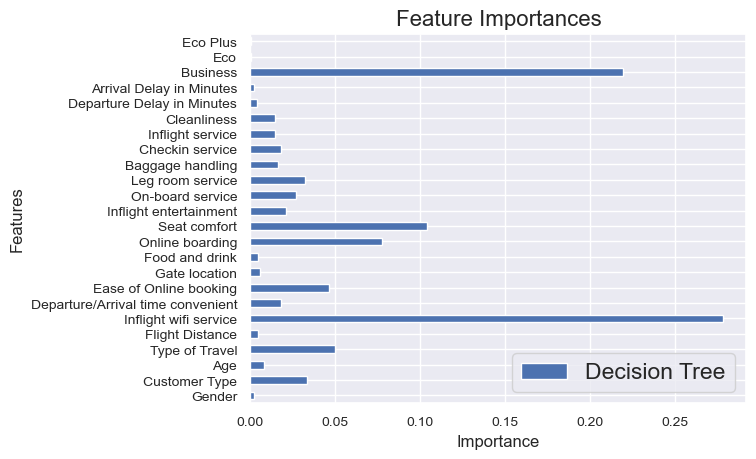

In [54]:
df = pd.DataFrame(DT.feature_importances_)
df.index=X_train.columns
df = df.rename(columns={0: 'Decision Tree'})
plt.figure(figsize=(10, 10))
ax = df.plot.barh()
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(axis='x', labelsize=10)
plt.title('Feature Importances', fontsize=16)
plt.show()

## Random Forest Classifier Model

### The best values for HyperParameters using GridSearchCV 

**n_estimators**: This hyperparameter determines the number of decision trees in the random forest. ***The default value is 100***.

**max_depth**: This hyperparameter determines the maximum depth of each decision tree. ***The default value is None***, which means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [55]:
# # define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 200], 
#     'max_depth'; [3 , 5 ,7 , 10 , 12 , None]
# }

# # create a Random Forest model instance
# rf = RandomForestClassifier()

# # create a GridSearchCV instance with the parameter grid and the Random Forest model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # fit the GridSearchCV instance on the training data
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)
# y_pred_grid_search = grid_search.predict(X_test)
# # print the best hyperparameters and corresponding score
# print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
# print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
# print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

**best values** :
               n_estimators = 100 ***(Default)***,
               max_depth = 12

### Train Random Forest classifier on the training data

In [56]:
RFC = RandomForestClassifier( max_depth = 12)
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=12)

### Make predictions on the test data

In [57]:
y_pred_RFC = RFC.predict(X_test)

### Evaluate the performance of the model

In [58]:
train_acc.append(RFC.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, RFC.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_RFC))
print("Train Accuracy:", RFC.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, RFC.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_RFC))
print("Recall:", recall_score(y_test, y_pred_RFC))
print("Precision:", precision_score(y_test, y_pred_RFC))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_RFC))
print("Classification report:\n", classification_report(y_test, y_pred_RFC))

Train Accuracy: 0.9610464835642226
Validation Accuracy: 0.9527923927209538
Test Accuracy: 0.9507664980499672
Recall: 0.9320960114214331
Precision: 0.9531021897810219
Confusion matrix:
 [[14176   514]
 [  761 10446]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14690
           1       0.95      0.93      0.94     11207

    accuracy                           0.95     25897
   macro avg       0.95      0.95      0.95     25897
weighted avg       0.95      0.95      0.95     25897



### Importance of Selected features for model 

<Figure size 1000x1000 with 0 Axes>

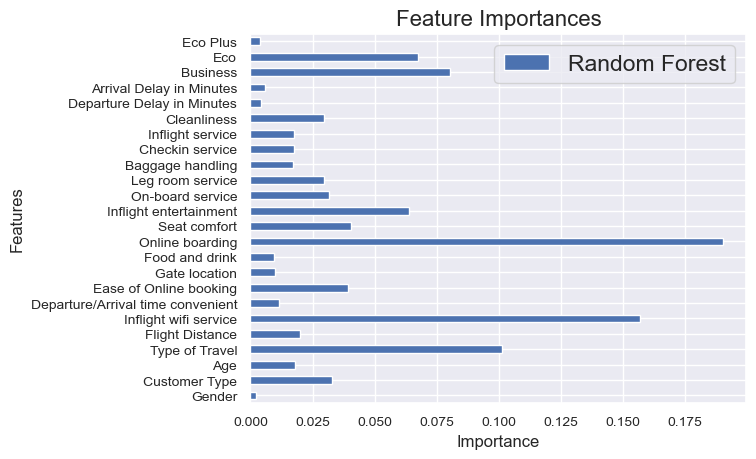

In [59]:
df = pd.DataFrame(RFC.feature_importances_)
df.index=X_train.columns
df = df.rename(columns={0: 'Random Forest'})
plt.figure(figsize=(10, 10))
ax = df.plot.barh()
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(axis='x', labelsize=10)
plt.title('Feature Importances', fontsize=16)
plt.show()

## Gradient Boosting Classifier Model

### The best values for HyperParameters using GridSearchCV 

**n_estimators**: This hyperparameter determines the number of weak learners (decision trees) in the boosting process. ***The default value is 100***.

**learning_rate**: This hyperparameter controls the contribution of each weak learner to the final prediction. A smaller learning rate results in a slower learning process but can lead to better generalization performance. ***The default value is 0.1***.


In [60]:
# # define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 200, 1000],
#     'learning_rate': [0.01, 0.1, 1]
# }

# # create a Gradient Boosting model instance
# gb = GradientBoostingClassifier()

# # create a GridSearchCV instance with the parameter grid and the Gradient Boosting model
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # fit the GridSearchCV instance on the training data
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)
# y_pred_grid_search = grid_search.predict(X_test)
# # print the best hyperparameters and corresponding score
# print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
# print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
# print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

**best values** :
               n_estimators = 100 ***(Default)*** ,
        learning_rate = 0.1 ***(Default)***

### Train Gradient Boosting classifier on the training data

In [61]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

### Make predictions on the test data

In [62]:
y_pred_GBC=GBC.predict(X_test)

### Evaluate the performance of the model

In [63]:
train_acc.append(GBC.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, GBC.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_GBC))
print("Train Accuracy:", GBC.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, GBC.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_GBC))
print("Recall:", recall_score(y_test, y_pred_GBC))
print("Precision:", precision_score(y_test, y_pred_GBC))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_GBC))
print("Classification report:\n", classification_report(y_test, y_pred_GBC))

Train Accuracy: 0.942523048703963
Validation Accuracy: 0.9442969541922093
Test Accuracy: 0.9428119087152952
Recall: 0.9216561077897742
Precision: 0.9448408342480791
Confusion matrix:
 [[14087   603]
 [  878 10329]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14690
           1       0.94      0.92      0.93     11207

    accuracy                           0.94     25897
   macro avg       0.94      0.94      0.94     25897
weighted avg       0.94      0.94      0.94     25897



### Importance of Selected features for model 

<Figure size 1000x1000 with 0 Axes>

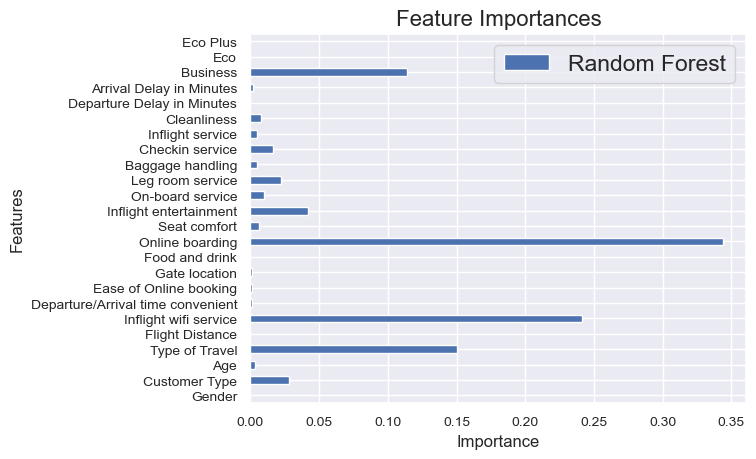

In [64]:
df = pd.DataFrame(GBC.feature_importances_)
df.index=X_train.columns
df = df.rename(columns={0: 'Random Forest'})
plt.figure(figsize=(10, 10))
ax = df.plot.barh()
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(axis='x', labelsize=10)
plt.title('Feature Importances', fontsize=16)
plt.show()

## Logistic Regression Classifier Model

### The best values for HyperParameters using GridSearchCV 

**C**: This hyperparameter determines the inverse of the regularization strength. Smaller values of C result in stronger regularization, which can help to reduce overfitting. ***The default value is 1.0***.

**penalty**: This hyperparameter determines the type of regularization used. The two options are 'l1' (L1 regularization) and 'l2' (L2 regularization). L1 regularization can be useful for feature selection, while L2 regularization can be useful for reducing the impact of outliers. ***The default value is 'l2'***.

**multi_class**: This hyperparameter determines the method used to handle multi-class classification problems. The three options are 'ovr' (one-vs-rest), 'multinomial' (softmax regression), and 'auto' (automatically select the best method based on the data and solver). ***The default value is 'ovr'***.

In [65]:
# # define the parameter grid to search over
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'penalty': ['l1', 'l2'],
#     'multi_class': ['ovr', 'multinomial']
# }

# # create a logistic regression model instance
# lr = LogisticRegression(max_iter=10000)

# # create a GridSearchCV instance with the parameter grid and the logistic regression model
# grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy',verbose=1,return_train_score=True)

# # fit the GridSearchCV instance on the training data
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)
# y_pred_grid_search = grid_search.predict(X_test)
# # print the best hyperparameters and corresponding score
# print("Train Score: ",grid_search.fit(X_train, y_train).score(X_train, y_train))
# print("Validation Accuracy:", accuracy_score(y_val, grid_search.predict(X_val)))
# print("Test Accuracy:", accuracy_score(y_test, y_pred_grid_search))
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

**best values** :
               C=0.1,
               penalty='l2' ***(Default)*** ,
               multi_class='multinomial'

### Train Logistic Regression

In [66]:
LR = LogisticRegression(C=0.1,max_iter=10000)
LR.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

### Make predictions on the test data

In [67]:
y_pred_LR = LR.predict(X_test)

### Evaluate the performance of the model

In [68]:
train_acc.append(LR.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, LR.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_LR))
print("Train Accuracy:", LR.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, LR.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Recall:", recall_score(y_test, y_pred_LR))
print("Precision:", precision_score(y_test, y_pred_LR))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_LR))
print("Classification report:\n", classification_report(y_test, y_pred_LR))

Train Accuracy: 0.874668146932471
Validation Accuracy: 0.8727132306801177
Test Accuracy: 0.875468200949917
Recall: 0.8365307397162488
Precision: 0.8706352154531947
Confusion matrix:
 [[13297  1393]
 [ 1832  9375]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     14690
           1       0.87      0.84      0.85     11207

    accuracy                           0.88     25897
   macro avg       0.87      0.87      0.87     25897
weighted avg       0.88      0.88      0.88     25897



## SVM Classifier Model

### Train SVM classifier on the training data

In [69]:
SVC = SVC(kernel = 'poly', degree = 4, random_state = 2, C = 50)
SVC.fit(X_train, y_train)

SVC(C=50, degree=4, kernel='poly', random_state=2)

### Make predictions on the test data

In [70]:
y_pred_SVC = SVC.predict(X_test)

### Evaluate the performance of the model

In [71]:
train_acc.append(SVC.score(X_train, y_train))
val_acc.append(accuracy_score(y_val, SVC.predict(X_val)))
test_acc.append(accuracy_score(y_test, y_pred_SVC))
print("Train Accuracy:", SVC.score(X_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, SVC.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_SVC))
print("Recall:", recall_score(y_test, y_pred_SVC))
print("Precision:", precision_score(y_test, y_pred_SVC))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_SVC))
print("Classification report:\n", classification_report(y_test, y_pred_SVC))

Train Accuracy: 0.924289231066274
Validation Accuracy: 0.9234927837042043
Test Accuracy: 0.9234660385372823
Recall: 0.8750780762023735
Precision: 0.9439792087785157
Confusion matrix:
 [[14108   582]
 [ 1400  9807]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     14690
           1       0.94      0.88      0.91     11207

    accuracy                           0.92     25897
   macro avg       0.93      0.92      0.92     25897
weighted avg       0.92      0.92      0.92     25897



# Comparison Between Models

The highest training accuracy is 0.965 and is achieved by the DecisionTree model.


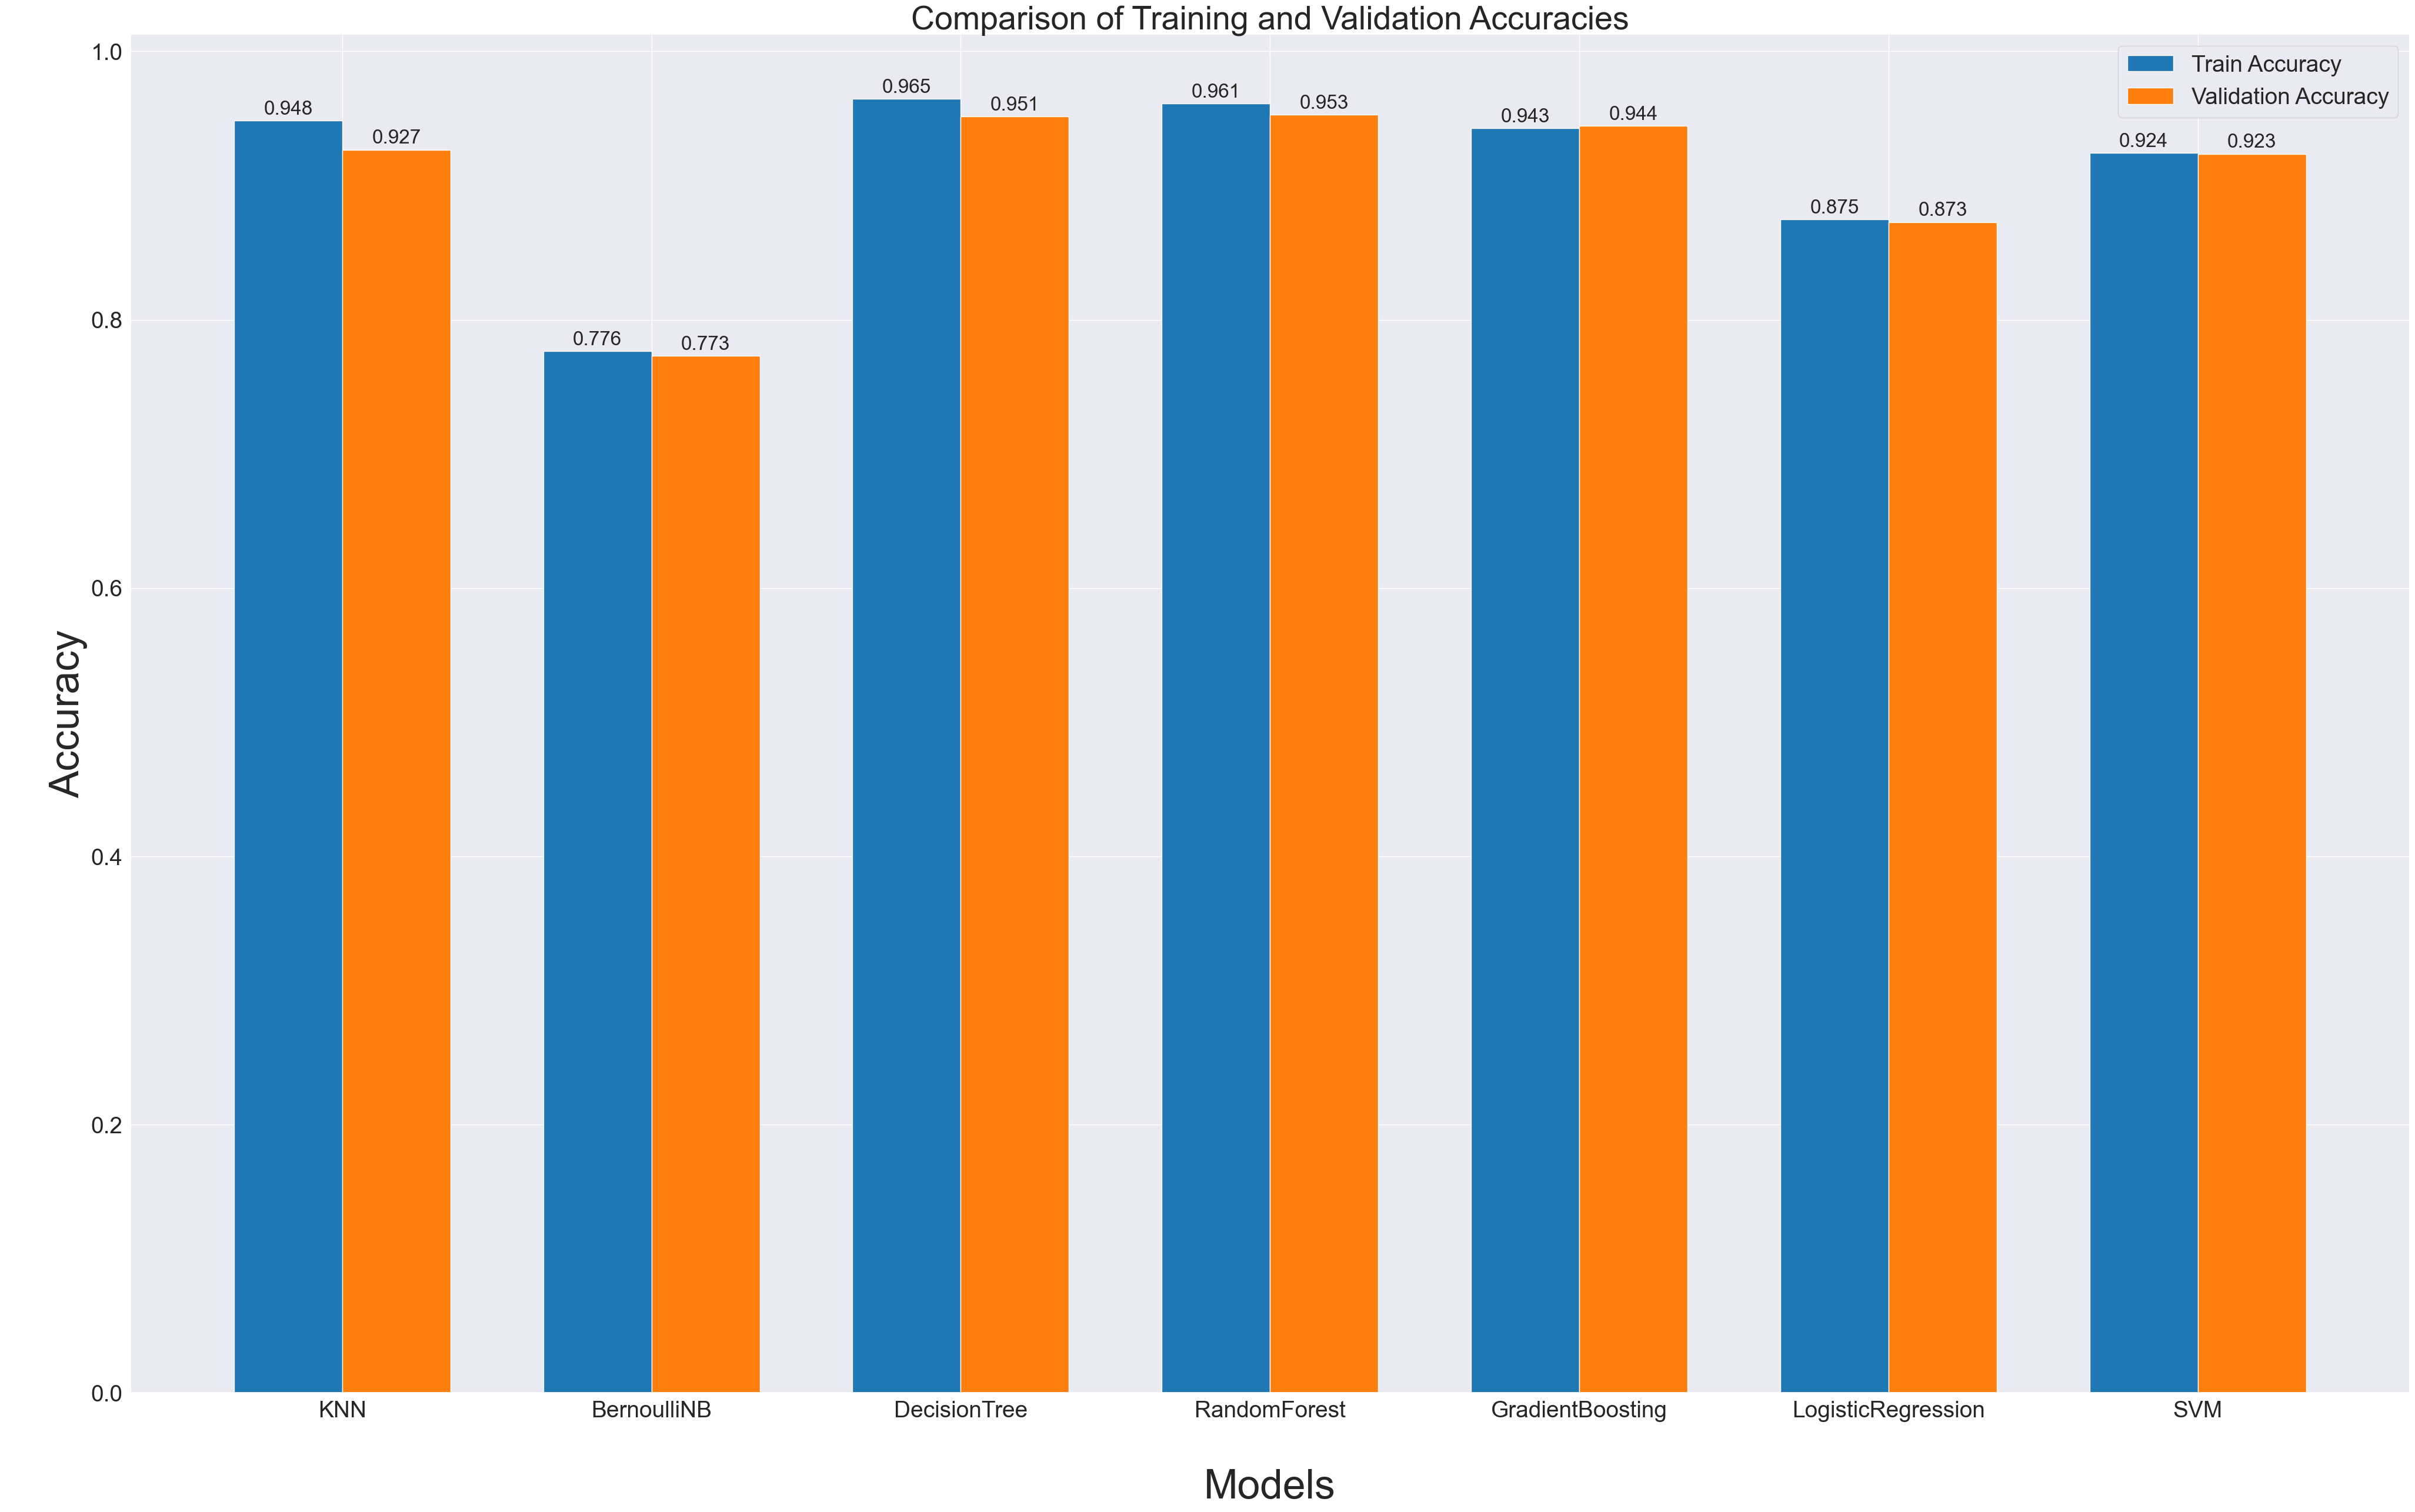

In [72]:
# Set the names of the models
models_names = ['KNN', 'BernoulliNB', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'LogisticRegression', 'SVM']
models=[KNN,BNB,DT,RFC,GBC,LR,SVC]

# Set the position of the bars on the x-axis
x = np.arange(len(models_names))

# Define the colors for the bars
train_color = '#1f77b4'
val_color = '#ff7f0e'

# Set the width of the bars
width = 0.35

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(50, 30))

# Create the bars for train accuracy
rects1 = ax.bar(x, train_acc, width, label='Train Accuracy', color=train_color)

# Create the bars for validation accuracy
rects2 = ax.bar(x + width, val_acc, width, label='Validation Accuracy', color=val_color)

# Add labels, title, and legend
ax.set_xlabel('\nModels', fontsize=50)
ax.set_ylabel('\nAccuracy', fontsize=50)
ax.set_title('Comparison of Training and Validation Accuracies', fontsize=40)
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models_names, fontsize=28)
ax.legend(fontsize=28)

# Add values above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=24)

autolabel(rects1)
autolabel(rects2)

# Find the highest train accuracy value and its corresponding model name
highest_train_acc = max(train_acc)
highest_train_acc_model = models_names[train_acc.index(highest_train_acc)]
print(f'The highest training accuracy is {highest_train_acc:.3f} and is achieved by the {highest_train_acc_model} model.')
Best_Model = models[train_acc.index(highest_train_acc)]

# Set the font size of the y-tick labels
ax.tick_params(axis='y', which='major', labelsize=28)

# Show the plot
plt.show()

# Best Model 

 ## Train accuracy vs Validation accuracy vs Test accuracy

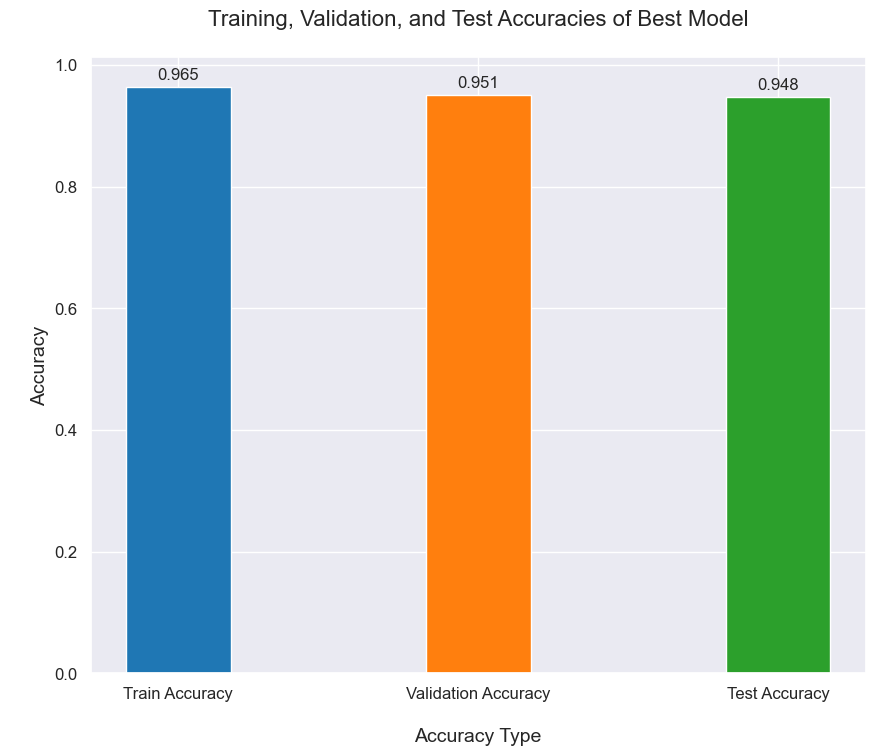

In [73]:
# Set the names of the accuracies
acc_names = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']

# Set the accuracies
train_accs = Best_Model.score(X_train,y_train)
val_accs = Best_Model.score(X_val,y_val)
test_accs = Best_Model.score(X_test,y_test)

# Set the position of the bars on the x-axis
x = np.arange(len(acc_names))

# Define the colors for the bars
train_color = '#1f77b4'  # blue
val_color = '#ff7f0e'  # orange
test_color = '#2ca02c'  # green

# Set the width of the bars
width = 0.35

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the bars for accuracies
rects = ax.bar(x, [train_accs, val_accs, test_accs], width, color=[train_color, val_color, test_color])

# Add labels, title, and legend
ax.set_xlabel('\nAccuracy Type', fontsize=14)
ax.set_ylabel('\nAccuracy', fontsize=14)
ax.set_title('Training, Validation, and Test Accuracies of Best Model\n', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(acc_names, fontsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)

# Add values above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel(rects)

# Show the plot
plt.show()

## Confusion Matrix

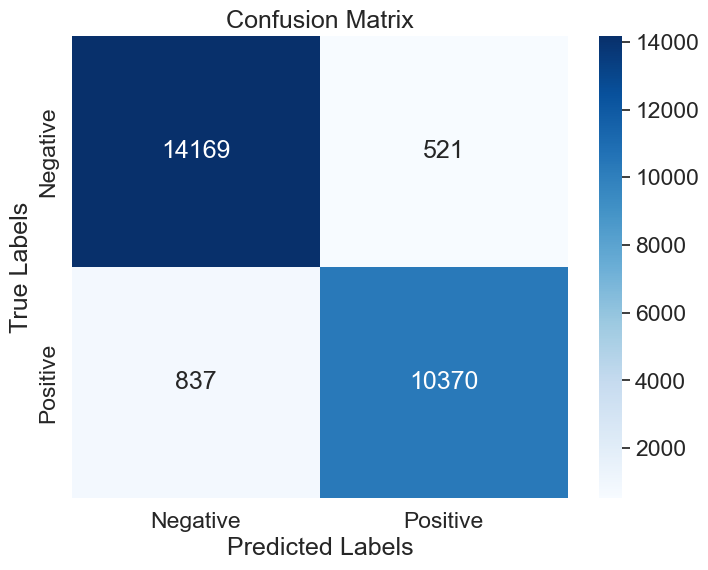

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Define the confusion matrix
conf_matrix = CM

# Define the class labels
classes = ['Negative', 'Positive']

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

# Set the axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()